In [35]:
import json
import matplotlib.pyplot as plt
import numpy as np

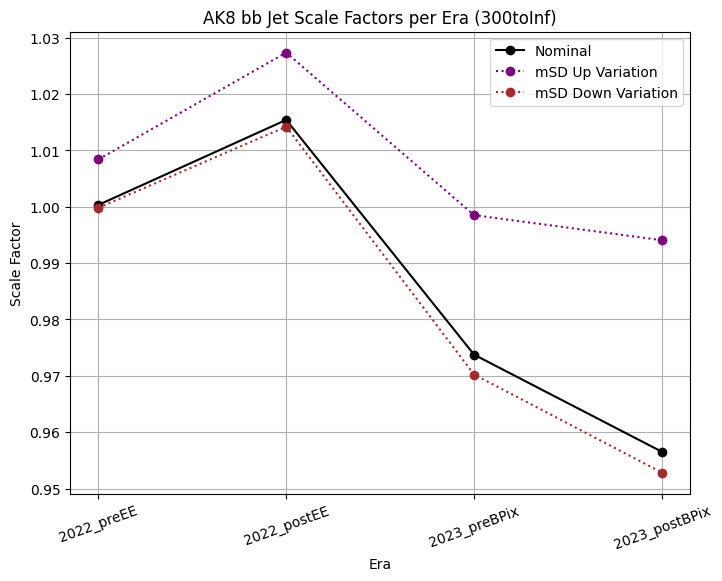

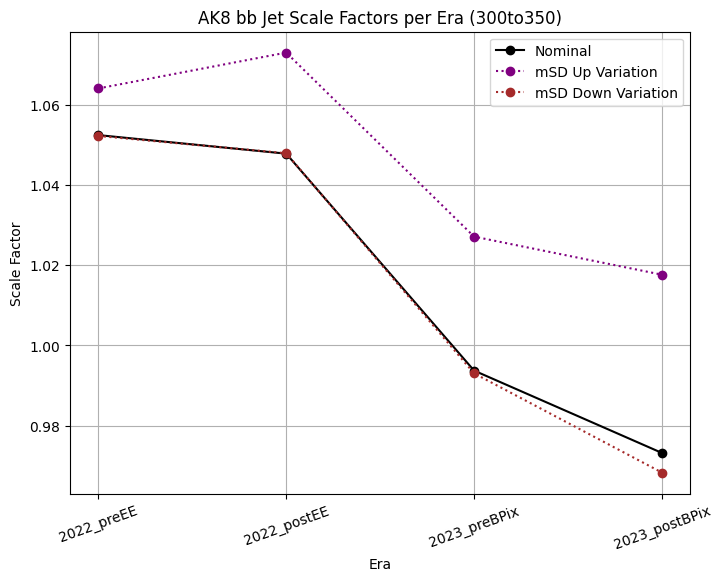

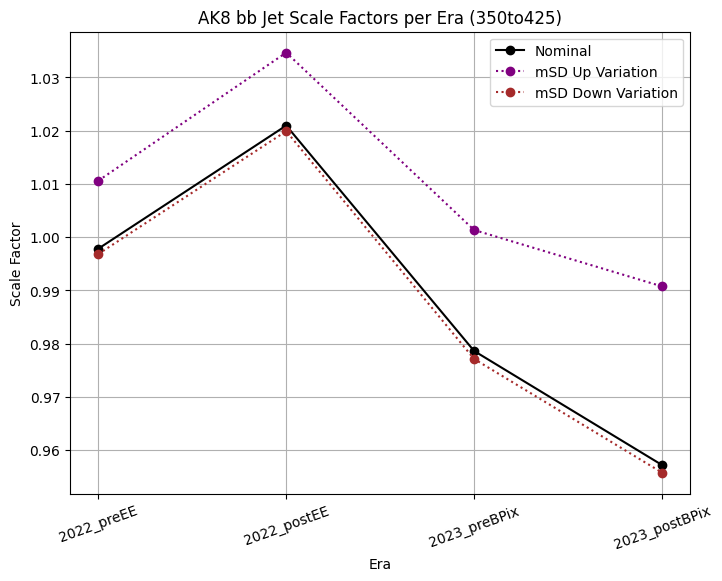

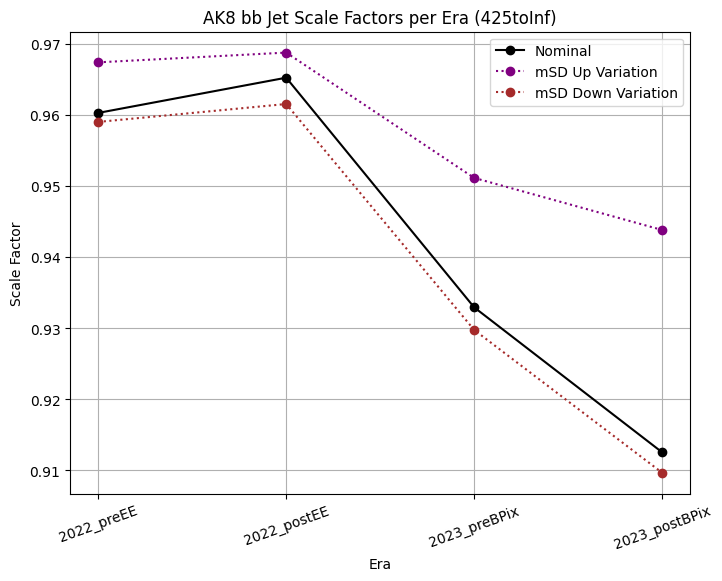

In [36]:
for bin in ["300toInf", "300to350", "350to425", "425toInf"]:
    json_2022_preEE = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2022_preEE.json"))
    json_2022_postEE = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2022_postEE.json"))
    json_2023_preBPix = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2023_preBPix.json"))
    json_2023_postBPix = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2023_postBPix.json"))

    nominals = []
    ups = []
    downs = []
    tau21ups = []
    tau21downs = []
    msdups = []
    msddowns = []

    eras = ["2022_preEE", "2022_postEE", "2023_preBPix", "2023_postBPix"]

    for era in eras:
        json_data = globals()[f"json_{era}"]
        values = {entry["key"]: entry["value"] for entry in json_data["corrections"][0]["data"]["content"][0]["content"]}
        nominal = values["nominal"]
        up = values["up"]
        down = values["down"]
        tau21up = values.get("tau21Up")
        tau21down = values.get("tau21Down")
        msdup = values.get("msdUp")
        msddown = values.get("msdDown")
        
        nominals.append(nominal)
        ups.append(up)
        downs.append(down)
        tau21ups.append(tau21up)
        tau21downs.append(tau21down)
        msdups.append(msdup)
        msddowns.append(msddown)

    fig, ax = plt.subplots(figsize=(8,6))
    x = np.arange(len(eras))
    ax.plot(x, nominals, label="Nominal", color="black", marker='o')
    # ax.plot(x, ups, label="Up Variation", color="red", linestyle="--", marker='o')
    # ax.plot(x, downs, label="Down Variation", color="blue", linestyle="--", marker='o')
    ax.plot(x, msdups, label="mSD Up Variation", color="purple", linestyle=":", marker='o')
    ax.plot(x, msddowns, label="mSD Down Variation", color="brown", linestyle=":", marker='o')
    # ax.plot(x, tau21ups, label="Tau21 Up Variation", color="green", linestyle=":", marker='o')
    # ax.plot(x, tau21downs, label="Tau21 Down Variation", color="orange", linestyle=":", marker='o')
    ax.set_xticks(x)
    ax.set_xticklabels(eras, rotation=20)
    ax.set_xlabel("Era")
    ax.set_ylabel("Scale Factor")
    ax.set_title(f"AK8 bb Jet Scale Factors per Era ({bin})")
    ax.legend()
    plt.grid()
    plt.savefig(f"./ak8_sf_jsons/ak8_bb_sf_per_era_with_mSD_test_{bin}.png")
    plt.show()

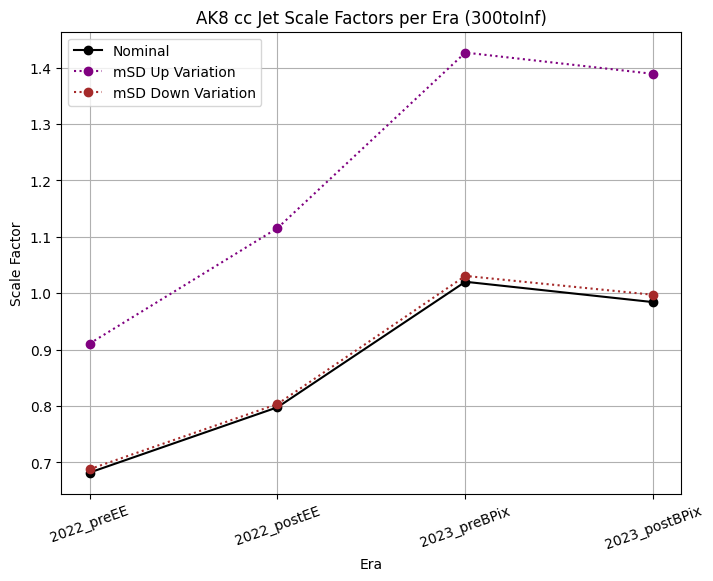

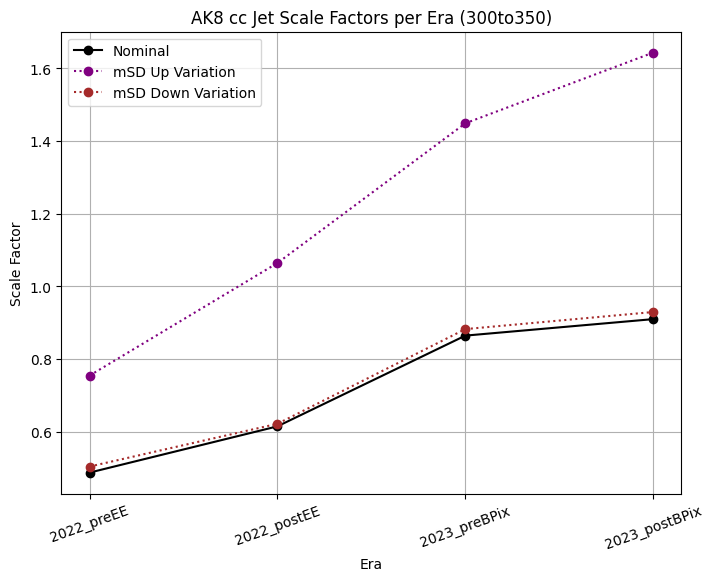

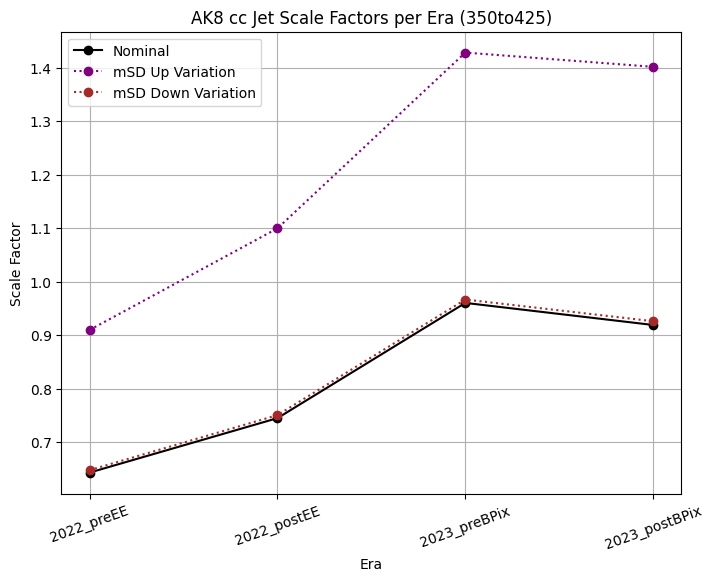

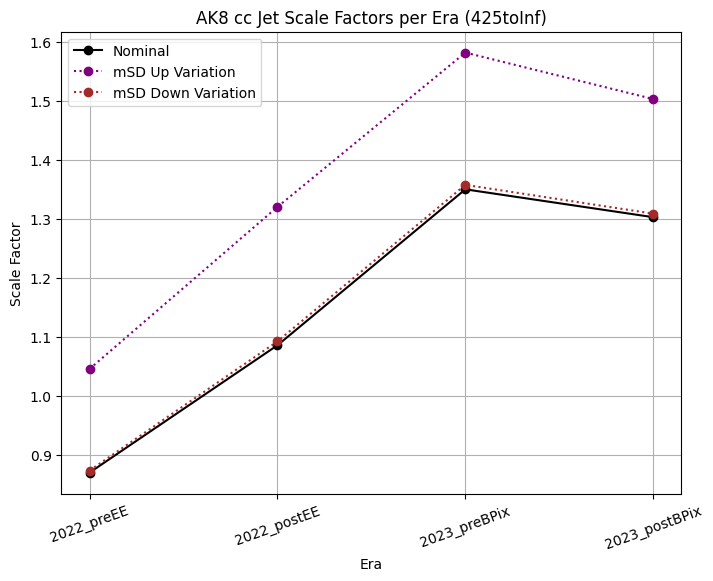

In [37]:
for bin in ["300toInf", "300to350", "350to425", "425toInf"]:
    json_2022_preEE = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2022_preEE.json"))
    json_2022_postEE = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2022_postEE.json"))
    json_2023_preBPix = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2023_preBPix.json"))
    json_2023_postBPix = json.load(open(f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin}__2023_postBPix.json"))

    nominals = []
    ups = []
    downs = []
    tau21ups = []
    tau21downs = []
    msdups = []
    msddowns = []

    eras = ["2022_preEE", "2022_postEE", "2023_preBPix", "2023_postBPix"]

    for era in eras:
        json_data = globals()[f"json_{era}"]
        values = {entry["key"]: entry["value"] for entry in json_data["corrections"][1]["data"]["content"][0]["content"]}
        nominal = values["nominal"]
        up = values["up"]
        down = values["down"]
        tau21up = values.get("tau21Up")
        tau21down = values.get("tau21Down")
        msdup = values.get("msdUp")
        msddown = values.get("msdDown")
        
        nominals.append(nominal)
        ups.append(up)
        downs.append(down)
        tau21ups.append(tau21up)
        tau21downs.append(tau21down)
        msdups.append(msdup)
        msddowns.append(msddown)

    fig, ax = plt.subplots(figsize=(8,6))
    x = np.arange(len(eras))
    ax.plot(x, nominals, label="Nominal", color="black", marker='o')
    # ax.plot(x, ups, label="Up Variation", color="red", linestyle="--", marker='o')
    # ax.plot(x, downs, label="Down Variation", color="blue", linestyle="--", marker='o')
    ax.plot(x, msdups, label="mSD Up Variation", color="purple", linestyle=":", marker='o')
    ax.plot(x, msddowns, label="mSD Down Variation", color="brown", linestyle=":", marker='o')
    # ax.plot(x, tau21ups, label="Tau21 Up Variation", color="green", linestyle=":", marker='o')
    # ax.plot(x, tau21downs, label="Tau21 Down Variation", color="orange", linestyle=":", marker='o')
    ax.set_xticks(x)
    ax.set_xticklabels(eras, rotation=20)
    ax.set_xlabel("Era")
    ax.set_ylabel("Scale Factor")
    ax.set_title(f"AK8 cc Jet Scale Factors per Era ({bin})")
    ax.legend()
    plt.grid()
    plt.savefig(f"./ak8_sf_jsons/ak8_cc_sf_per_era_with_mSD_test_{bin}.png")
    plt.show()

In [39]:
# Tables grouped by pT bin across eras (from msdtest JSONs)
import pandas as pd
import math

pt_eras = ["2022_preEE", "2022_postEE", "2023_preBPix", "2023_postBPix"]
bins_list = ["300toInf", "300to350", "350to425", "425toInf"]

def _fmt_unc(value: float | None) -> str:
    if value is None:
        return "n/a"
    return f"+{value:.4f}/-{value:.4f}"

def _bin_label_from_tag(tag: str) -> str:
    if tag.endswith("toInf"):
        low = int(tag.replace("toInf", ""))
        return f"[{low}, +Inf]"
    low, high = tag.split("to")
    return f"[{int(low)}, {int(high)}]"

def _load_values_from_json(path: str, corr_idx: int) -> dict:
    with open(path) as f:
        data = json.load(f)
    corr = data["corrections"][corr_idx]
    return {entry["key"]: entry["value"] for entry in corr["data"]["content"][0]["content"]}

def _sym_unc(nominal: float, up: float, down: float) -> float:
    return max(up - nominal, nominal - down)

def format_sf_table_per_pt(bin_tag: str, flavour: str = "bb") -> pd.DataFrame:
    rows = []
    corr_idx = 0 if flavour == "bb" else 1
    bin_label = _bin_label_from_tag(bin_tag)

    for era in pt_eras:
        path = f"ak8_sf_jsons/ak8_sf_msdtest_Pt-{bin_tag}__{era}.json"
        values = _load_values_from_json(path, corr_idx)
        nominal = values["nominal"]
        sym_fit = _sym_unc(nominal, values["up"], values["down"])
        sym_tau = None
        if values.get("tau21Up") is not None and values.get("tau21Down") is not None:
            sym_tau = _sym_unc(nominal, values["tau21Up"], values["tau21Down"])
        sym_msd = None
        if values.get("msdUp") is not None and values.get("msdDown") is not None:
            sym_msd = _sym_unc(nominal, values["msdUp"], values["msdDown"])
        total_unc = math.sqrt(sym_fit**2 + (sym_tau or 0.0) ** 2 + (sym_msd or 0.0) ** 2)
        rows.append({
            "Era": era,
            "pT bin": bin_label,
            "SF": f"{nominal:.4f}",
            "Fit Unc": _fmt_unc(sym_fit),
            "Tau21 Unc": _fmt_unc(sym_tau),
            "mSD Unc": _fmt_unc(sym_msd),
            "Total Unc": f"+{total_unc:.4f}/-{total_unc:.4f}",
        })

    return pd.DataFrame(rows)

for bin_tag in bins_list:
    display(
        format_sf_table_per_pt(bin_tag, flavour="bb")
        .style.hide(axis="index")
        .set_caption(f"AK8 bb SFs {_bin_label_from_tag(bin_tag)}")
    )

for bin_tag in bins_list:
    display(
        format_sf_table_per_pt(bin_tag, flavour="cc")
        .style.hide(axis="index")
        .set_caption(f"AK8 cc SFs {_bin_label_from_tag(bin_tag)}")
    )

Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[300, +Inf]",1.0003,+0.0131/-0.0131,+0.0323/-0.0323,+0.0081/-0.0081,+0.0358/-0.0358
2022_postEE,"[300, +Inf]",1.0154,+0.0128/-0.0128,+0.0584/-0.0584,+0.0119/-0.0119,+0.0610/-0.0610
2023_preBPix,"[300, +Inf]",0.9738,+0.0126/-0.0126,+0.0400/-0.0400,+0.0247/-0.0247,+0.0487/-0.0487
2023_postBPix,"[300, +Inf]",0.9565,+0.0128/-0.0128,+0.0387/-0.0387,+0.0375/-0.0375,+0.0554/-0.0554


Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[300, 350]",1.0524,+0.0158/-0.0158,+0.0489/-0.0489,+0.0116/-0.0116,+0.0527/-0.0527
2022_postEE,"[300, 350]",1.0478,+0.0139/-0.0139,+0.0574/-0.0574,+0.0252/-0.0252,+0.0642/-0.0642
2023_preBPix,"[300, 350]",0.9937,+0.0141/-0.0141,+0.0282/-0.0282,+0.0334/-0.0334,+0.0459/-0.0459
2023_postBPix,"[300, 350]",0.9732,+0.0155/-0.0155,+0.0409/-0.0409,+0.0444/-0.0444,+0.0623/-0.0623


Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[350, 425]",0.9978,+0.0146/-0.0146,+0.0250/-0.0250,+0.0128/-0.0128,+0.0316/-0.0316
2022_postEE,"[350, 425]",1.0209,+0.0134/-0.0134,+0.0734/-0.0734,+0.0137/-0.0137,+0.0758/-0.0758
2023_preBPix,"[350, 425]",0.9786,+0.0137/-0.0137,+0.0422/-0.0422,+0.0227/-0.0227,+0.0498/-0.0498
2023_postBPix,"[350, 425]",0.9572,+0.0149/-0.0149,+0.0421/-0.0421,+0.0335/-0.0335,+0.0559/-0.0559


Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[425, +Inf]",0.9603,+0.0143/-0.0143,+0.0351/-0.0351,+0.0071/-0.0071,+0.0386/-0.0386
2022_postEE,"[425, +Inf]",0.9653,+0.0131/-0.0131,+0.0470/-0.0470,+0.0037/-0.0037,+0.0489/-0.0489
2023_preBPix,"[425, +Inf]",0.9330,+0.0136/-0.0136,+0.0512/-0.0512,+0.0182/-0.0182,+0.0560/-0.0560
2023_postBPix,"[425, +Inf]",0.9126,+0.0155/-0.0155,+0.0492/-0.0492,+0.0313/-0.0313,+0.0604/-0.0604


Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[300, +Inf]",0.6817,+0.1287/-0.1287,+0.0874/-0.0874,+0.2288/-0.2288,+0.2767/-0.2767
2022_postEE,"[300, +Inf]",0.7975,+0.1426/-0.1426,+0.1454/-0.1454,+0.3178/-0.3178,+0.3775/-0.3775
2023_preBPix,"[300, +Inf]",1.0202,+0.1725/-0.1725,+0.0956/-0.0956,+0.4065/-0.4065,+0.4518/-0.4518
2023_postBPix,"[300, +Inf]",0.9841,+0.1007/-0.1007,+0.0727/-0.0727,+0.4049/-0.4049,+0.4235/-0.4235


Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[300, 350]",0.4872,+0.1054/-0.1054,+0.2168/-0.2168,+0.2671/-0.2671,+0.3599/-0.3599
2022_postEE,"[300, 350]",0.6145,+0.1176/-0.1176,+0.1786/-0.1786,+0.4497/-0.4497,+0.4980/-0.4980
2023_preBPix,"[300, 350]",0.8643,+0.1653/-0.1653,+0.1250/-0.1250,+0.5846/-0.5846,+0.6202/-0.6202
2023_postBPix,"[300, 350]",0.9097,+0.1770/-0.1770,+0.2480/-0.2480,+0.7339/-0.7339,+0.7946/-0.7946


Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[350, 425]",0.6432,+0.1289/-0.1289,+0.1648/-0.1648,+0.2666/-0.2666,+0.3389/-0.3389
2022_postEE,"[350, 425]",0.7450,+0.1404/-0.1404,+0.2096/-0.2096,+0.3547/-0.3547,+0.4352/-0.4352
2023_preBPix,"[350, 425]",0.9603,+0.1644/-0.1644,+0.1581/-0.1581,+0.4679/-0.4679,+0.5205/-0.5205
2023_postBPix,"[350, 425]",0.9191,+0.1156/-0.1156,+0.0874/-0.0874,+0.4825/-0.4825,+0.5038/-0.5038


Era,pT bin,SF,Fit Unc,Tau21 Unc,mSD Unc,Total Unc
2022_preEE,"[425, +Inf]",0.8695,+0.1669/-0.1669,+0.1097/-0.1097,+0.1759/-0.1759,+0.2662/-0.2662
2022_postEE,"[425, +Inf]",1.0856,+0.2029/-0.2029,+0.1384/-0.1384,+0.2348/-0.2348,+0.3398/-0.3398
2023_preBPix,"[425, +Inf]",1.3502,+0.2393/-0.2393,+0.1149/-0.1149,+0.2321/-0.2321,+0.3526/-0.3526
2023_postBPix,"[425, +Inf]",1.3029,+0.2474/-0.2474,+0.1173/-0.1173,+0.2005/-0.2005,+0.3394/-0.3394
